# Linear Regression:


  In linear regression we are provided with dependent (Y) and independent (X) variables, we have to find the function which describes relationship between dependent and independent variables.  Linear relationship can be described with following equation.
$$Y = mX + c $$ 

Here, Y is the dependent variable we are trying to predict.

X is the independent variable we are using to make predictions.

m is the slop of the regression line which represents the effect X has on Y

c is a constant, known as the Y-intercept. If X = 0,Y would be equal to c.

Furthermore, the linear relationship can be positive or negative in nature as explained below

# Steps applied in linear regression modeling

The following steps are applied in linear regression modeling in industry:

1.Missing value and outlier treatment

2.Correlation check of independent variables

3.Train and test random classification

4.Fit the model on train data

5.Evaluate model on test data






### Moving forward to my 1st task. Here I'm provided with student_score.csv file. In this particular problem I have to train machine learning model using given data set and the to predict the percentage obtained by student given the time spend in studying.  

In [1]:
# Importing important libraries:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
student_score =pd.read_csv("student_scores - student_scores.csv")

In [3]:
student_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# checking if data set have any Missing values.
print(student_score.info())
print("\n----------------------")
print("Missing values: ",student_score.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None

----------------------
Missing values:  Hours     0
Scores    0
dtype: int64


Dataset doesn't have any missing value. As the dataset is small we will not look for outliers.

In [5]:
# Looking for correlation between the hours and score.

print('Correlation between hours and score:',student_score.corr())

Correlation between hours and score:            Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


There is strong correlation between hours and scores

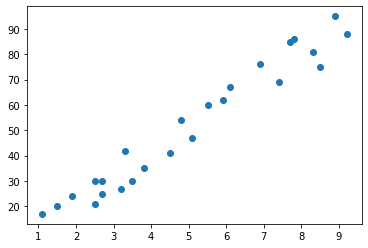

In [6]:
plt.scatter(student_score.Hours, student_score.Scores)

So from the Graph we can see that as number of studying hours increases Scores also increases.

#### Prepareing the data.

In [7]:
X = student_score.iloc[:, :-1].values  
y = student_score.iloc[:, 1].values  

In [8]:
# Train and test random classification
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

In [9]:
#Applying Machine Learning model
linear_model=LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [10]:
#Predicting using test set
y_pred=linear_model.predict(x_test)

### Evaluting Model.
There are various matrics used for evaluating the performance of model. Here I used Mean Squared error and R2 Score to evaluate the model. R Square is a good measure to determine how well the model fits the dependent variables.While,  Mean Square Error is an absolute measure of the goodness for the fit.



In [11]:
#checking Performance of model
from sklearn.metrics import mean_squared_error, r2_score
print('mean square error:', mean_squared_error(y_test, y_pred))
print('R2_score: ', r2_score(y_test,y_pred))

mean square error: 22.96509721270043
R2_score:  0.9568211104435257


So from the above results we can see that my model is 95.68 % accurate. 

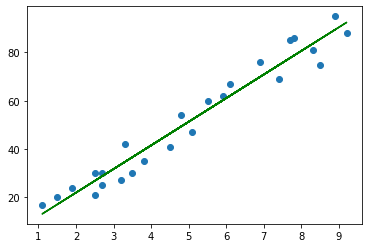

In [12]:
#Now we will plot regression line
line= linear_model.coef_*X + linear_model.intercept_

plt.scatter(X,y)
plt.plot(X, line,color='green')
plt.show()

In [13]:
# Comparing Actual vs Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


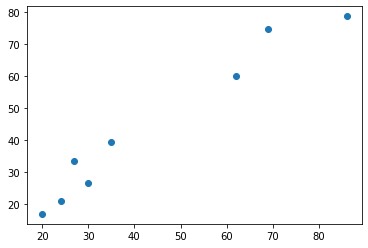

In [14]:
plt.scatter(y_test, y_pred)

In [15]:
#Now testing with our own data.
hours = 9.25
pred = linear_model.predict(np.array([[hours]]))
print("No of Hours = ",hours)
print("Predicted Score = ",pred)

No of Hours =  9.25
Predicted Score =  [92.91505723]
